In [ ]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total_pkr:float
# Defines shape of data that moves between langraph nodes

In [13]:
def calc_total(state: PortfolioState)->PortfolioState:
    state['total_usd'] = state['amount_usd'] *  1.08  # Assuming a conversion rate of 1.0 for USD to USD
    return state

def calc_to_pkr(state:PortfolioState)->PortfolioState:
    state['total_pkr'] = state['total_usd'] *  283.19  # Assuming a conversion rate of 280 PKR to 1 USD
    return state


In [14]:
from langgraph.graph import StateGraph,START,END
# creating a LangGraph flow, and telling it what kind of state it should track and pass between steps.
builder=StateGraph(PortfolioState) 

# we add nodes
builder.add_node("calc_total", calc_total)
builder.add_node("calc_to_pkr", calc_to_pkr)
# we add edges
builder.add_edge(START, "calc_total")
builder.add_edge("calc_total", "calc_to_pkr")  
builder.add_edge("calc_to_pkr", END)

graph = builder.compile()
# The need for LangGraph and this graph-based approach comes from a desire to manage complex, multi-step language model workflows cleanly, declaratively, and modularly 

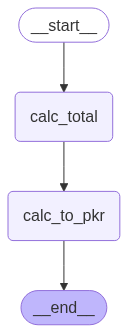

In [15]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({
    "amount_usd": 1000.0})

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_pkr': 305845.2}

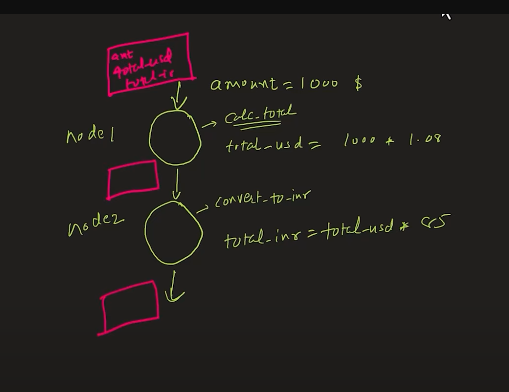 

This is a linear workflow meaning:
1. No branching
2. No loops
3. Each node runs exactly once in a fixed order

##### LangChain can implement linear workflows but it doesn’t structure them as clearly as LangGraph does.

##### LangChain by itself does not natively support non-linear workflows (like branching logic, loops, or condition-based jumps) in a clean, maintainable way